# DBSCAN
Small project


## 1. ALGORITHM
1. for each point draw n-dimensional sphere radius r
2. assign all points to core, border or noise. *Core* is point with more than MinPoints within radius r. *border* is point with one core point in sphere. *noise* is not core or border.
3. assign core point to one cluster, and all points in core sphere, and all border points.
4. remove noise.
4. loop all points within sphere and expand.

### 1.2. PARAMS:
1. epsilon - sphere radius
2. min_samples - number of samples within sphere to declare core point

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

## 2. PREPARING DATA

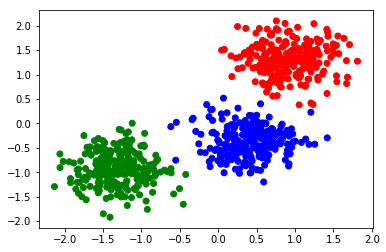

In [32]:
centers = [[2,2], [-2,-2], [1,-1]]
X, y = make_blobs(n_samples=750,centers=centers,cluster_std=0.6,random_state=0)

X = StandardScaler().fit_transform(X)

c = ['r', 'g', 'b']
cy = [c[x] for x in y]

plt.figure(1)
plt.scatter(X[:,0], X[:,1], c=cy)
plt.show()

## 3. DBSCAN

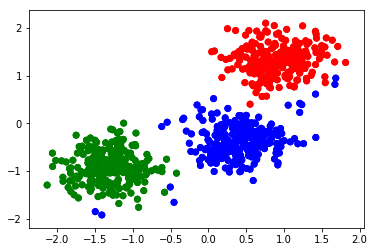

In [35]:
dbscn = DBSCAN(eps=0.3, min_samples=10)
yPred = dbscn.fit_predict(X)
cyp = [c[x] for x in yPred]

plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=cyp)
plt.show()

## 4. EVALUATION

### 4.1. Adjusted Rand Index

In [37]:
Rval = metrics.adjusted_rand_score(y, yPred)
print(Rval)

0.965829474152


## 5. REAL WORLD DATA

In [64]:
iris = pd.read_csv('iris.data')

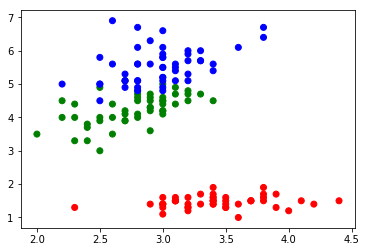

In [74]:
X = np.array(iris.values[:,1:3])
y = np.array(iris.values[:,4])
yval = np.unique(y)
ynum = list(range(0,len(y)))
ymap = dict(zip(yval,ynum))
y = [ymap[x] for x in y]

cy = [c[x] for x in y]

plt.figure(3)
plt.scatter(X[:,0], X[:,1],c=cy)
plt.show()

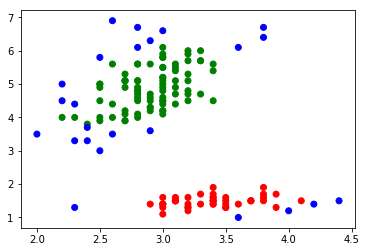

In [75]:
dbscn = DBSCAN(eps=0.3, min_samples=10)
ypred = dbscn.fit_predict(X)

cyp = [c[x] for x in ypred]

plt.figure(4)
plt.scatter(X[:,0], X[:,1],c=cyp)
plt.show()

In [76]:
Rval = metrics.adjusted_rand_score(y, ypred)
print(Rval)

0.453938080528
